In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets

from multi_logistic_regression_gd import MultiLogisticRegressorGD
from multi_perceptron import MultiPerceptron

#Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres wszystkich próbek
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


##1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

C:\Users\klikk\AppData\Local\Temp\ipykernel_5720\1723270556.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
C:\Users\klikk\AppData\Local\Temp\ipykernel_5720\1723270556.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


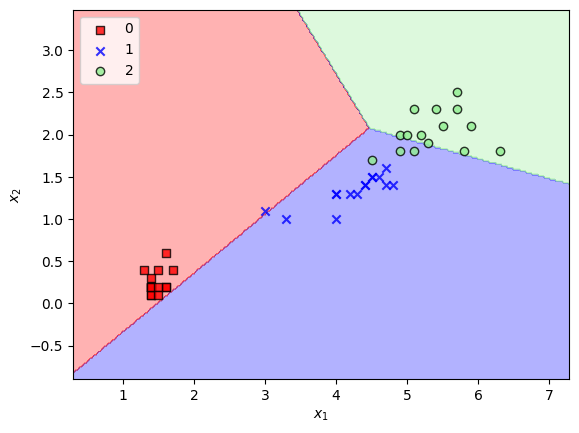

In [9]:
iris_ds = datasets.load_iris()
X = iris_ds.data[:, [2, 3]]
y = iris_ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
model = MultiPerceptron(eta=0.01,n_iter=400)
model.fit(X_train,y_train)

plot_decision_regions(X=X_test, y=y_test, classifier=model)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

##2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [ ]:
iris_ds = datasets.load_iris()
X = iris_ds.data[:, [2, 3]]
y = iris_ds.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
model = MultiPerceptron(eta=0.01,n_iter=400)
model.fit(X_train,y_train)

plot_decision_regions(X=X_test, y=y_test, classifier=model)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

C:\Users\klikk\AppData\Local\Temp\ipykernel_5720\1723270556.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')
C:\Users\klikk\AppData\Local\Temp\ipykernel_5720\1723270556.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


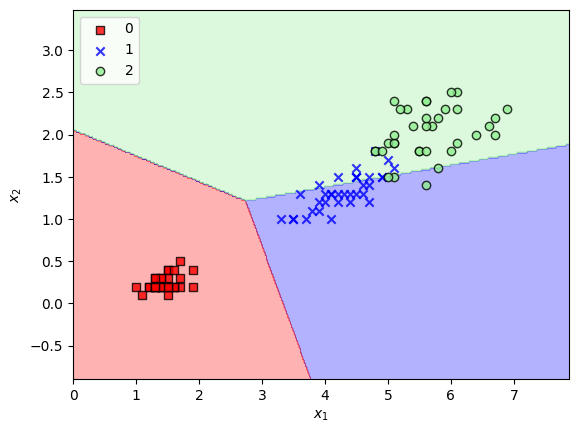

In [22]:

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

#w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)
X_train_01_subset = X_train#[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train#[(y_train == 0) | (y_train == 1)]
lrgd = MultiLogisticRegressorGD(eta=0.001, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()


##3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

In [23]:
preds = lrgd.predict(X_test)
cfx = confusion_matrix(y_test,preds)
preds_probs = lrgd.predict_proba(X_test)

In [24]:
cfx

array([[15,  0,  0],
       [ 0, 11,  4],
       [ 0,  0, 15]], dtype=int64)

In [25]:
preds_probs

array([[7.44145364e-04, 2.94991106e-01, 8.77489386e-01],
       [8.43179740e-01, 2.36869125e-01, 2.17588610e-02],
       [9.08040520e-01, 2.21999917e-01, 1.59028311e-02],
       [8.53929167e-03, 3.11925092e-01, 5.46118957e-01],
       [1.80424896e-02, 3.72008683e-01, 3.41824455e-01],
       [3.71218958e-02, 3.37886796e-01, 2.71019864e-01],
       [1.23587660e-03, 4.85723764e-01, 6.57544419e-01],
       [1.28915928e-02, 3.61361770e-01, 4.09687529e-01],
       [1.95248371e-03, 3.79210246e-01, 7.01313750e-01],
       [9.01591127e-01, 1.93117960e-01, 2.05348009e-02],
       [8.75288993e-01, 2.14182010e-01, 2.11381637e-02],
       [4.08801264e-03, 3.44790475e-01, 6.26979782e-01],
       [9.24007767e-01, 2.41731200e-01, 1.21241588e-02],
       [1.54646677e-01, 3.11067810e-01, 1.28044984e-01],
       [9.24007767e-01, 2.41731200e-01, 1.21241588e-02],
       [1.06681322e-02, 4.34465536e-01, 3.55253902e-01],
       [1.10940989e-03, 2.56120484e-01, 8.72639879e-01],
       [1.28915928e-02, 3.61361